# Robótica Móvel - Trabalho Prático 1
---
**Nome Completo:** Daniel Terra Gomes

**Matrícula:** 2025702870 

**Programa:** Mestrando do PPGCC
**Departamento:** Departamento de Ciência da Computação
**Instituição:** ICEx-UFMG
**E-mail:** danielterragomes@ufmg.br

**Data:** 11 de setembro de 2025

---

## Exercício 1: Criação da Cena no CoppeliaSim

O primeiro passo foi criar uma cena no CoppeliaSim contendo um robô móvel (Pioneer 3DX) e cinco outros objetos distintos (pessoa, mesa, cadeira, planta, e caixote) para popular o ambiente de simulação. A imagem abaixo documenta a cena criada.

![CoppeliaSim Scene](Screenshot%20from%202025-09-04%2009-26-53.png)

*Figura 1: Cena criada no CoppeliaSim contendo o robô Pioneer 3DX e cinco objetos distintos (pessoa, mesa, cadeira, planta, e caixote)*

## Exercício 2: Diagrama de Transformações

O diagrama a seguir representa as relações entre os sistemas de coordenadas dos objetos na cena. O frame do Mundo {W} serve como referência global. 

![Transformation Diagram](ex2-diagram.drawio.png)

*Figura 2: Diagrama de transformações mostrando o sistema de coordenadas do ex.1 e as relações entre os diferentes sistemas de coordenadas na cena. As setas sólidas (Verdes) representam transformações diretas do objeto conhecidos, enquanto a seta (Vermelha) mostra uma transformação desejada (Desconhecida).*



## Exercise 3: Spatial Transformation Implementation


In [73]:
import numpy as np
import math
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple, Optional, Any
from coppeliasim_zmqremoteapi_client import RemoteAPIClient

# Configuration constants
# Set a name for the object > Name of the object in CoppeliaSim Scene
OBJECT_MAPPING = {
    'Robot': 'RobotnikSummitXL',
    'Bill_0': 'Bill[0]',
    'Bill_1': 'Bill[1]',
    'Crate': 'Floor/ConcretBlock',
    'Pillar_0': 'Floor/20cmHighPillar10cm[0]',
    'Pillar_1': 'Floor/20cmHighPillar10cm[1]',
    'Table': 'diningTable',
    'Laptop_0': 'diningTable/laptop[0]',
    'Laptop_1': 'diningTable/laptop[1]',
    'Fence_0': 'Floor/20cmHighWall100cm[0]',
    'Fence_1': 'Floor/20cmHighWall100cm[1]'
}

class CoppeliaSimConnector:
    """Handles connection and communication with CoppeliaSim simulator."""

    def __init__(self):
        self.client = None
        self.sim = None
        self.object_handles = {}

    def connect(self) -> bool:
        """Establish connection to CoppeliaSim."""
        try:
            self.client = RemoteAPIClient()
            self.sim = self.client.require('sim')
            return True
        except Exception as e:
            print(f"Connection failed: {e}")
            return False

    def discover_objects(self) -> Dict[str, int]:
        """Discover and map objects in the scene."""
        try:
            all_objects = self.sim.getObjectsInTree(self.sim.handle_scene)
            scene_objects = {}

            for handle in all_objects:
                try:
                    name = self.sim.getObjectAlias(handle, 1)
                    if not name:
                        name = self.sim.getObjectName(handle)
                    if name:
                        scene_objects[name.strip()] = handle
                except:
                    continue

            # Map expected objects to actual scene objects
            for expected_name, pattern in OBJECT_MAPPING.items():
                for scene_name, handle in scene_objects.items():
                    if pattern in scene_name:
                        self.object_handles[expected_name] = handle
                        break

            return self.object_handles

        except Exception as e:
            print(f"Object discovery failed: {e}")
            return {}

    def get_object_pose(self, object_name: str, reference_frame: Optional[str] = None) -> Optional[Tuple[np.ndarray, np.ndarray]]:
        """Get position and orientation of an object."""
        if object_name not in self.object_handles:
            return None

        try:
            handle = self.object_handles[object_name]
            ref_handle = self.sim.handle_world

            if reference_frame and reference_frame in self.object_handles:
                ref_handle = self.object_handles[reference_frame]

            position = np.array(self.sim.getObjectPosition(handle, ref_handle))
            orientation = np.array(self.sim.getObjectOrientation(handle, ref_handle))

            return position, orientation

        except Exception as e:
            print(f"Failed to get pose for {object_name}: {e}")
            return None

# Initialize connection
connector = CoppeliaSimConnector()
if connector.connect():
    object_handles = connector.discover_objects()
    print(f"Connected to CoppeliaSim. Found {len(object_handles)} objects.")
    for name, handle in object_handles.items():
        print(f"  {name}: Handle {handle}")
else:
    print("Failed to connect to CoppeliaSim.")

Connected to CoppeliaSim. Found 11 objects.
  Robot: Handle 89
  Bill_0: Handle 56
  Bill_1: Handle 130
  Crate: Handle 25
  Pillar_0: Handle 29
  Pillar_1: Handle 49
  Table: Handle 118
  Laptop_0: Handle 122
  Laptop_1: Handle 126
  Fence_0: Handle 17
  Fence_1: Handle 21


In [74]:
# Get robot pose and orientation
robot_pose = connector.get_object_pose('Robot')

if robot_pose:
  position, orientation = robot_pose
  print("Robot Pose:")
  print(f"Position (x, y, z): {position}")
  print(f"Orientation (rx, ry, rz): {orientation}")
  print(f"Position in meters: [{position[0]:.3f}, {position[1]:.3f}, {position[2]:.3f}]")
  print(f"Orientation in radians: [{orientation[0]:.3f}, {orientation[1]:.3f}, {orientation[2]:.3f}]")
else:
  print("Failed to get robot pose")

Robot Pose:
Position (x, y, z): [ 2.45636004 -2.31136391  0.30902216]
Orientation (rx, ry, rz): [ 1.43198019e-03 -2.75386612e-05  2.18149324e+00]
Position in meters: [2.456, -2.311, 0.309]
Orientation in radians: [0.001, -0.000, 2.181]


In [75]:
# Get Bill_1 pose and orientation
bill1_pose = connector.get_object_pose('Bill_1')

if bill1_pose:
  position, orientation = bill1_pose
  print("Bill_1 Pose:")
  print(f"Position (x, y, z): {position}")
  print(f"Orientation (rx, ry, rz): {orientation}")
  print(f"Position in meters: [{position[0]:.3f}, {position[1]:.3f}, {position[2]:.3f}]")
  print(f"Orientation in radians: [{orientation[0]:.3f}, {orientation[1]:.3f}, {orientation[2]:.3f}]")
  print(f"Z-axis rotation (yaw): {np.degrees(orientation[2]):.1f}° = {orientation[2]:.3f} rad")
else:
  print("Failed to get Bill_1 pose")

Bill_1 Pose:
Position (x, y, z): [2.2   1.875 0.   ]
Orientation (rx, ry, rz): [-0.         -0.          3.14159265]
Position in meters: [2.200, 1.875, 0.000]
Orientation in radians: [-0.000, -0.000, 3.142]
Z-axis rotation (yaw): 180.0° = 3.142 rad


In [76]:
# Utility functions for transformations
def Rz(theta):
    """Creates a 3x3 rotation matrix around the Z-axis."""
    return np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta),  np.cos(theta), 0],
                     [0,              0,             1]])

def Ry(theta):
    """Creates a 3x3 rotation matrix around the Y-axis."""
    return np.array([[np.cos(theta),  0, np.sin(theta)],
                     [0,              1, 0],
                     [-np.sin(theta), 0, np.cos(theta)]])

def Rx(theta):
    """Creates a 3x3 rotation matrix around the X-axis."""
    return np.array([[1, 0,              0],
                     [0, np.cos(theta), -np.sin(theta)],
                     [0, np.sin(theta),  np.cos(theta)]])

def create_homogeneous_matrix(position: np.ndarray, euler_angles: np.ndarray) -> np.ndarray:
    """
    Creates a 4x4 homogeneous transformation matrix from position and Euler angles.
    Based on aula04-descricao-espacial-transformacoes-rigidas.pdf, page 35.
    """
    alpha, beta, gamma = euler_angles
    # Rotation matrix from Z-Y-X Euler angles
    R = Rz(alpha) @ Ry(beta) @ Rx(gamma)

    # Create the 4x4 homogeneous matrix
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = position
    return T

def invert_homogeneous_matrix(T: np.ndarray) -> np.ndarray:
    """
    Efficiently inverts a 4x4 homogeneous transformation matrix.
    Based on aula05-transformacoes-homogeneas-espaco-configuracoes.pdf, page 16.
    """
    R = T[:3, :3]
    P = T[:3, 3]

    R_inv = R.T
    P_inv = -R_inv @ P

    T_inv = np.eye(4)
    T_inv[:3, :3] = R_inv
    T_inv[:3, 3] = P_inv
    return T_inv

In [77]:
def plot_frame(Porg: np.ndarray, R: np.ndarray, c: Optional[List[str]] = None, label: Optional[str] = None):
    """
    Plots a 2D coordinate frame. Reused from class notebooks.
    Porg: The origin of the frame.
    R: The 3x3 rotation matrix of the frame.
    """
    axis_size = 0.5
    axes = axis_size * R

    x_axis = np.array(axes[0:2, 0])
    y_axis = np.array(axes[0:2, 1])

    if c is None:
        c = ['r', 'g']

    # Plot X and Y axes
    plt.quiver(*Porg[0:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    plt.quiver(*Porg[0:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)

    if label:
        plt.text(Porg[0], Porg[1] + 0.1, label, fontsize=9)

/tmp/ipykernel_4833/3849439003.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


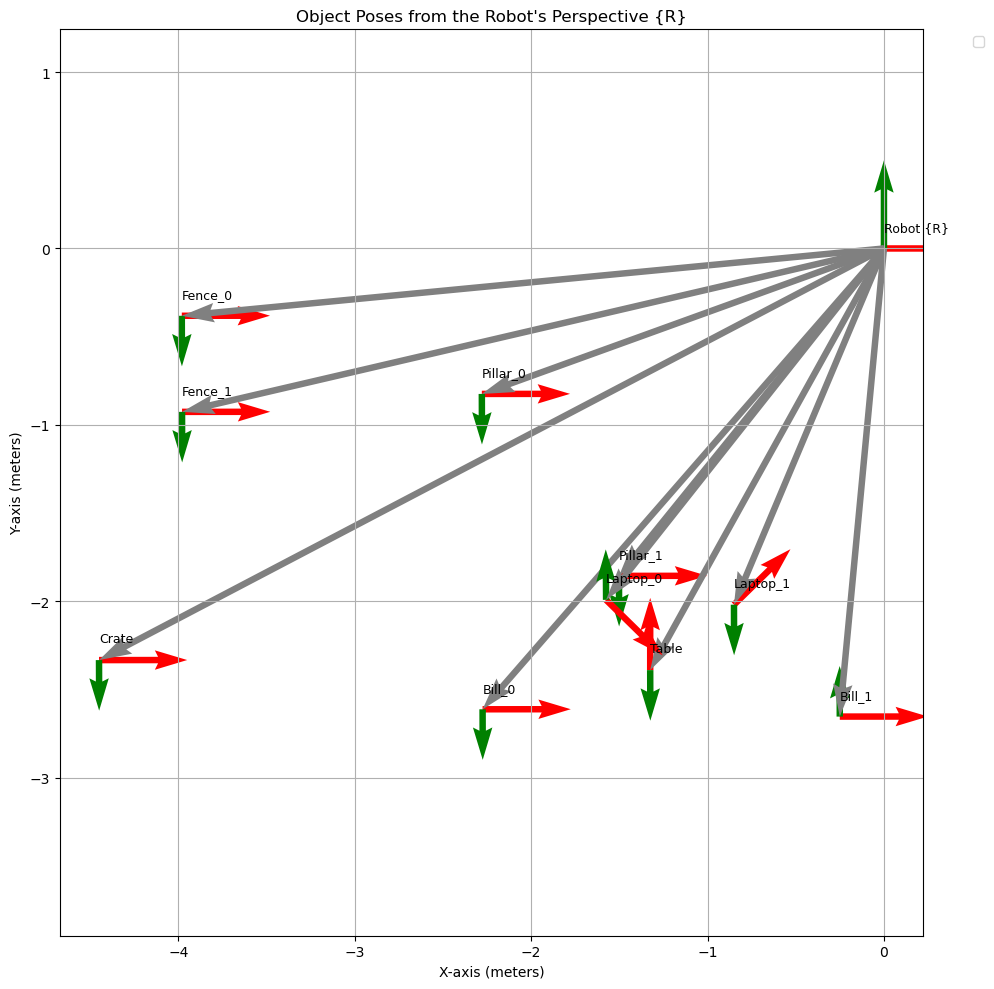

In [78]:
# --- Main Script for Exercise 3 ---
# This assumes the 'connector' object is already connected and has discovered objects.

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Object Poses from the Robot's Perspective {R}")
ax.set_xlabel("X-axis (meters)")
ax.set_ylabel("Y-axis (meters)")
ax.grid(True)

# 1. The robot's frame {R} is the origin of our plot
robot_local_origin = np.array([0, 0, 0])
robot_local_rotation = np.eye(3) # Identity matrix (no rotation)
plot_frame(robot_local_origin, robot_local_rotation, label="Robot {R}")

# 2. Get the Robot's GLOBAL pose and compute its inverse matrix
robot_pose_global = connector.get_object_pose('Robot')
if robot_pose_global:
    pos_R_W, ang_R_W = robot_pose_global
    T_W_R = create_homogeneous_matrix(pos_R_W, ang_R_W)
    T_R_W = invert_homogeneous_matrix(T_W_R) # This is (T_W_R)^-1

    # 3. Loop through all other objects
    for name, handle in object_handles.items():
        if name == 'Robot':
            continue # Skip the robot itself

        object_pose_global = connector.get_object_pose(name)
        if object_pose_global:
            pos_O_W, ang_O_W = object_pose_global

            # 4. Create the object's GLOBAL homogeneous matrix
            T_W_O = create_homogeneous_matrix(pos_O_W, ang_O_W)

            # 5. Calculate the object's pose RELATIVE to the robot
            # This is the core formula: T_R_O = inv(T_W_R) * T_W_O
            T_R_O = T_R_W @ T_W_O

            # 6. Extract position and rotation for plotting
            pos_O_R = T_R_O[:3, 3] # Position of the object in the robot's frame
            R_O_R = T_R_O[:3, :3]   # Rotation of the object in the robot's frame

            # 7. Plot the object's frame and a vector to it
            plot_frame(pos_O_R, R_O_R, label=name)
            ax.quiver(0, 0, pos_O_R[0], pos_O_R[1], angles='xy', scale_units='xy', scale=1, color='gray', linestyle='--')

# Configure and show the plot
ax.axis('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# EX4

In [79]:

def calculate_and_plot_relative_poses(connector: CoppeliaSimConnector, scenario_title: str):
    """
    Calculates the poses of all scene objects relative to the robot and generates a plot.
    This function encapsulates the logic from Exercise 3.

    Args:
        connector: The active CoppeliaSimConnector instance.
        scenario_title: A title for the plot to identify the scenario.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(f"Object Poses from the Robot's Perspective {{R}}\\n{scenario_title}")
    ax.set_xlabel("X-axis (meters)")
    ax.set_ylabel("Y-axis (meters)")
    ax.grid(True)

    # 1. The robot's frame {R} is the origin of our plot
    robot_local_origin = np.array([0, 0, 0])
    robot_local_rotation = np.eye(3)
    plot_frame(robot_local_origin, robot_local_rotation, label="Robot {R}")

    # 2. Get the Robot's GLOBAL pose and compute its inverse matrix
    robot_pose_global = connector.get_object_pose('Robot')
    if robot_pose_global:
        pos_R_W, ang_R_W = robot_pose_global
        T_W_R = create_homogeneous_matrix(pos_R_W, ang_R_W)
        T_R_W = invert_homogeneous_matrix(T_W_R)

        # 3. Loop through all other objects
        object_handles = connector.object_handles
        for name, handle in object_handles.items():
            if name == 'Robot':
                continue

            object_pose_global = connector.get_object_pose(name)
            if object_pose_global:
                pos_O_W, ang_O_W = object_pose_global

                # 4. Create the object's GLOBAL homogeneous matrix
                T_W_O = create_homogeneous_matrix(pos_O_W, ang_O_W)

                # 5. Calculate the object's pose RELATIVE to the robot
                T_R_O = T_R_W @ T_W_O

                # 6. Extract position and rotation for plotting
                pos_O_R = T_R_O[:3, 3]
                R_O_R = T_R_O[:3, :3]

                # 7. Plot the object's frame and a vector to it
                plot_frame(pos_O_R, R_O_R, label=name)
                ax.quiver(0, 0, pos_O_R[0], pos_O_R[1], angles='xy', scale_units='xy', scale=1, color='gray', linestyle='--')

    # Configure and show the plot
    ax.axis('equal')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

--- Generating Plot for Scenario A: Initial Pose ---


/tmp/ipykernel_4833/3900448253.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


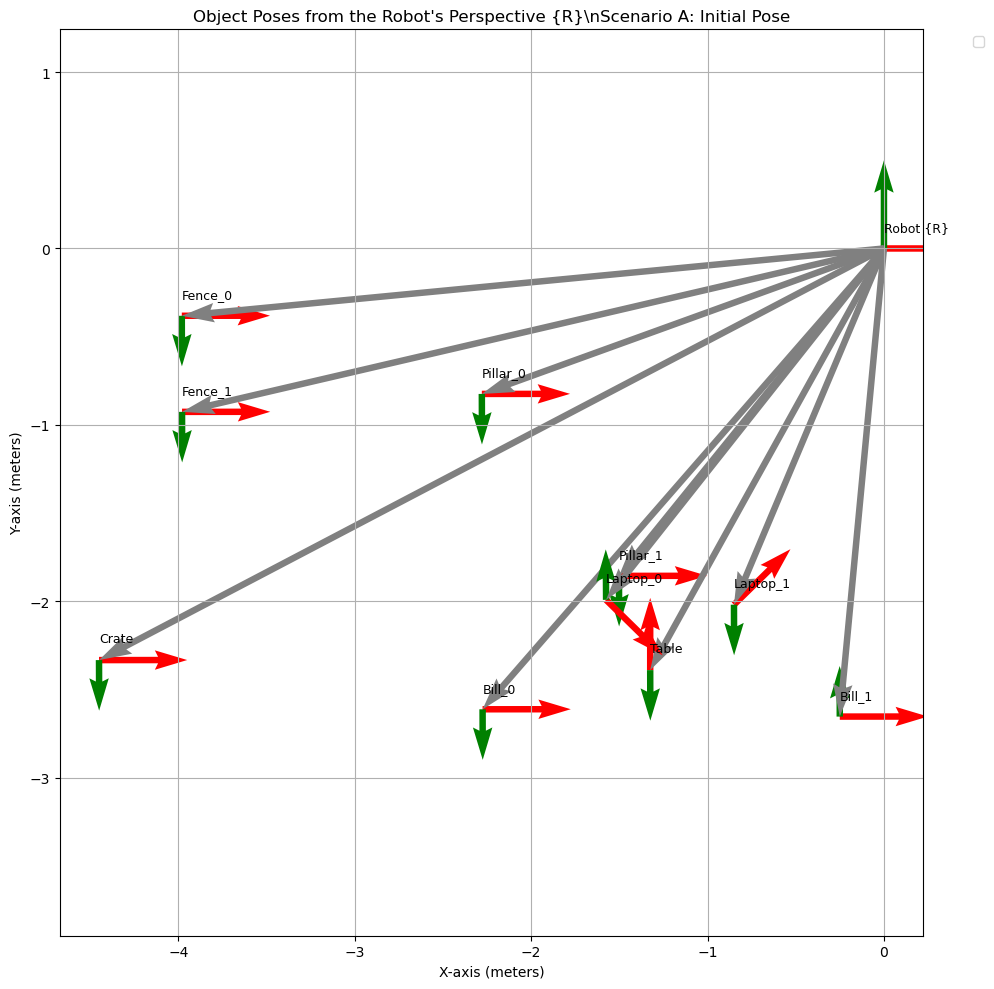

\n--- Generating Plot for Scenario B: Side Pose (90° Rotation) ---


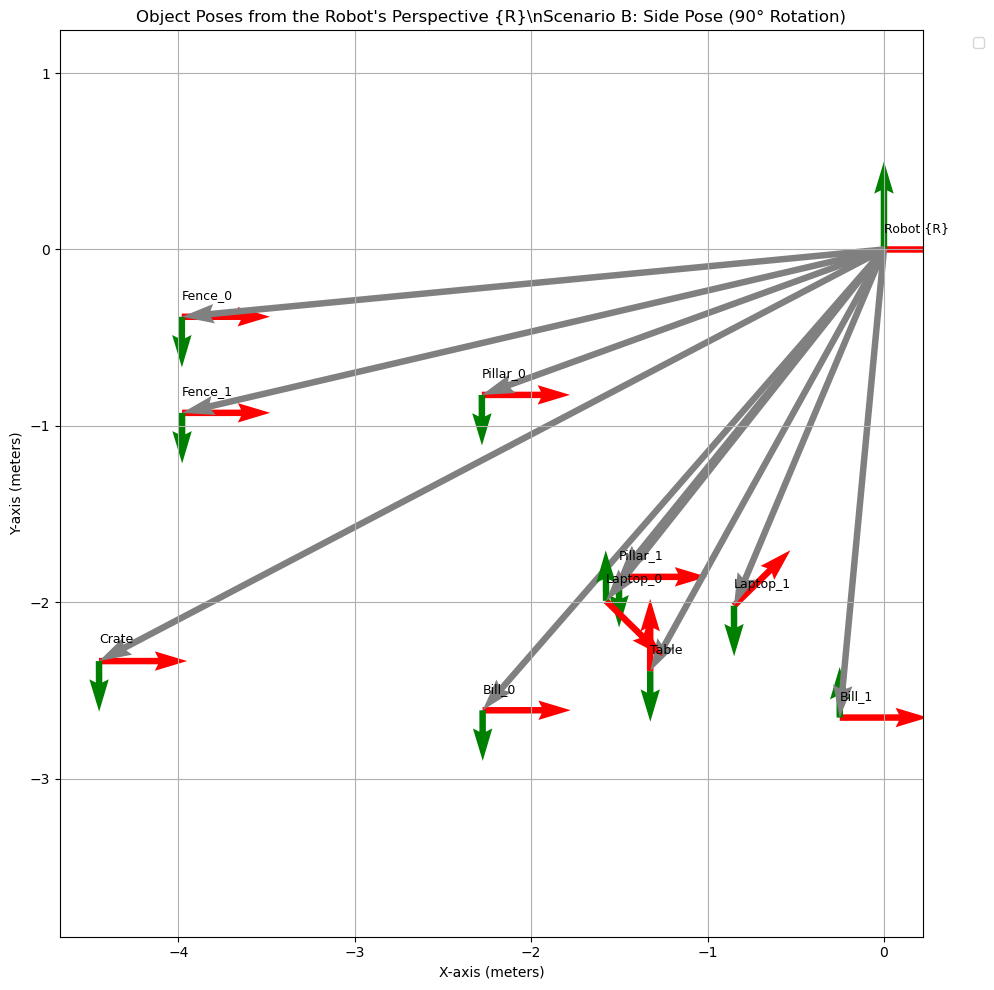

\n--- Generating Plot for Scenario C: Rear Pose (180° Rotation) ---


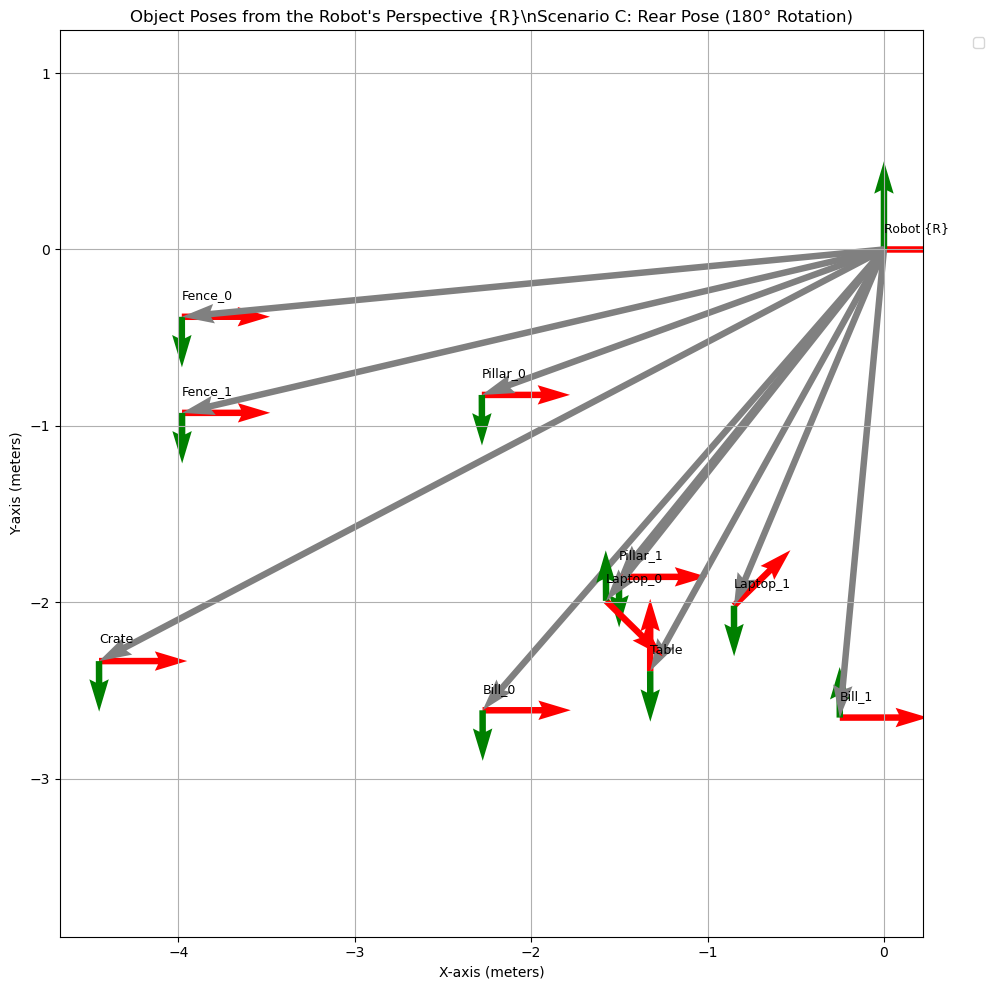

In [80]:
# --- Test Scenarios for Exercise 4 ---

# SCENARIO A: Place the robot in its initial position in CoppeliaSim and run this.
print("--- Generating Plot for Scenario A: Initial Pose ---")
calculate_and_plot_relative_poses(connector, "Scenario A: Initial Pose")

# SCENARIO B: Move the robot and rotate it ~90 degrees. Then run this.
print("\\n--- Generating Plot for Scenario B: Side Pose (90° Rotation) ---")
calculate_and_plot_relative_poses(connector, "Scenario B: Side Pose (90° Rotation)")

# SCENARIO C: Move the robot again and rotate it ~180 degrees. Then run this.
print("\\n--- Generating Plot for Scenario C: Rear Pose (180° Rotation) ---")
calculate_and_plot_relative_poses(connector, "Scenario C: Rear Pose (180° Rotation)")